# Cyber Security Attack Detector

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [45]:
features_df = pd.read_csv(
    "Datasets/Large_Model_Dataset/NUSW-NB15_features.csv", 
    encoding="ISO-8859-1"
)
column_names = features_df['Name'].tolist()

In [46]:
file_paths = ["Datasets/Large_Model_Dataset/UNSW-NB15_1.csv", "Datasets/Large_Model_Dataset/UNSW-NB15_2.csv", "Datasets/Large_Model_Dataset/UNSW-NB15_3.csv", "Datasets/Large_Model_Dataset/UNSW-NB15_4.csv"]

dfs = [pd.read_csv(path, header=None, names=column_names) for path in file_paths]
combined_df = pd.concat(dfs, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15124\455982995.py:3: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(path, header=None, names=column_names) for path in file_paths]
C:\Users\Admin\AppData\Local\Temp\ipykernel_15124\455982995.py:3: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(path, header=None, names=column_names) for path in file_paths]


In [47]:
combined_df

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [48]:
combined_df['ct_flw_http_mthd'].fillna(combined_df['ct_flw_http_mthd'].mean(), inplace=True)
combined_df['is_ftp_login'].fillna(combined_df['is_ftp_login'].mean(), inplace=True)
combined_df['attack_cat'].fillna(combined_df['attack_cat'].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15124\1648328151.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['ct_flw_http_mthd'].fillna(combined_df['ct_flw_http_mthd'].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15124\1648328151.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [49]:
values = combined_df['ct_ftp_cmd'].values

In [50]:
cleaned_values = []

for i in values:
    try:
        if type(i) == str:
            if i == " ":
                cleaned_values.append(10)
            else:
                cleaned_values.append(int(i))
        else:
            cleaned_values.append(int(i))
    except:
        cleaned_values.append(10)

In [51]:
combined_df['ct_ftp_cmd'] = cleaned_values

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [54]:
le.fit(combined_df[['attack_cat']])

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [55]:
combined_df['attack_cat'] = le.transform(combined_df[['attack_cat']])

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [56]:
combined_df.drop(columns=['dsport', 'srcip', 'dstip', 'sport'], inplace=True)

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [58]:
cols = combined_df.select_dtypes(include="object").columns

In [59]:
new_cols_values = []

for i in cols:
    le.fit(combined_df[[i]])
    combined_df[i] = le.transform(combined_df[[i]])

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklea

In [60]:
x = combined_df.iloc[:,:-1]
y = combined_df['Label']

In [61]:
ss = StandardScaler()
ss.fit(x)

StandardScaler()

In [62]:
x = pd.DataFrame(ss.transform(x), columns=x.columns)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [66]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [67]:
xgb.score(x_train, y_train)*100, xgb.score(x_test, y_test)*100

(99.99399617231379, 99.98385858546092)

In [68]:
cm = confusion_matrix(y_test, xgb.predict(x_test))

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    443831
           1       1.00      1.00      1.00     64179

    accuracy                           1.00    508010
   macro avg       1.00      1.00      1.00    508010
weighted avg       1.00      1.00      1.00    508010



In [70]:
labels = ["Normal", "Attack"]

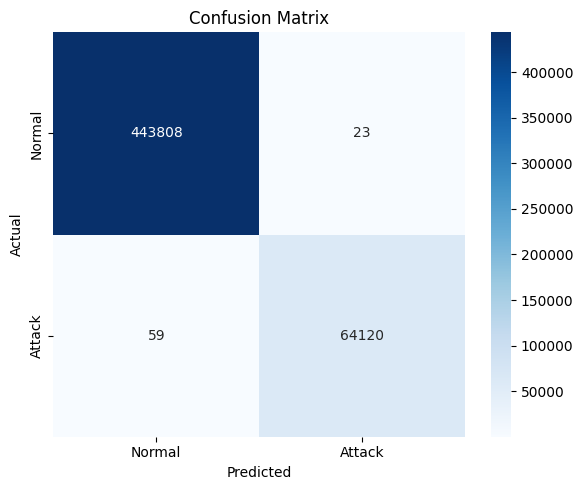

In [71]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [72]:
values = x_test

In [88]:
xgb.predict([x_test.to_numpy()[61]])

array([0])

In [89]:
y_test.to_numpy()[61]

np.int64(0)